In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

cc1=pd.read_excel("diyige.xlsx",encoding="gbk")
X=cc1[["2015 SR","2015 总分","2015 CY","2015 HJ","2015 WJ","2015 SS"]]
y=cc1["2020 SR"]

In [7]:
for i  in range(1,6):
    for j in range(1,i+1):
        j=j-1
        print((i-1)*2+j,end="\t")
        

0	2	3	4	5	6	6	7	8	9	8	9	10	11	12	

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import joblib
from sklearn.model_selection import GridSearchCV #网格搜索
from sklearn.model_selection import StratifiedKFold #交叉验证



In [15]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
ss_x = StandardScaler()
x_train = ss_x.fit_transform(x_train)
x_test = ss_x.transform(x_test)
ss_y = StandardScaler()
y_train = ss_y.fit_transform(np.array(y_train).reshape(-1, 1))
y_test = ss_y.transform(np.array(y_test).reshape(-1, 1))
gbr = GradientBoostingClassifier(min_samples_split=200,min_samples_leaf=200)

gbr.fit(x_train, y_train.astype('int'))
joblib.dump(gbr, 'train_model_result4.m')   # 保存模型

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


['train_model_result4.m']

In [26]:

y_gbr = gbr.predict(x_train)
y_gbr1 = gbr.predict(x_test)
acc_train = gbr.score(x_train, y_train.astype('int'))
acc_test = gbr.score(x_test, y_test.astype('int'))
print(acc_train)
print(acc_test)
y_gbr1

0.6887871853546911
0.6917808219178082


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
tt=np.array(["1.649","0.82697","0.86468","0.90721","0.39356","1.0448"]).reshape(1, -1)
tt_p = gbr.predict(tt)
tt_p

array([0])

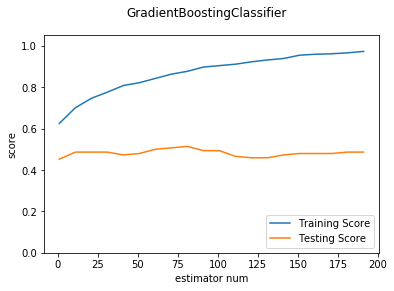

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets,ensemble
from sklearn.model_selection import train_test_split
def test_GradientBoostingClassifier_num(*data):
    '''
    测试 GradientBoostingClassifier 的预测性能随 n_estimators 参数的影响
    '''
    X_train,X_test,y_train,y_test=data
    nums=np.arange(1,200,step=10)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for num in nums:
        clf=ensemble.GradientBoostingClassifier(n_estimators=num)
        clf.fit(X_train,y_train)
        training_scores.append(clf.score(X_train,y_train))
        testing_scores.append(clf.score(X_test,y_test))
    ax.plot(nums,training_scores,label="Training Score")
    ax.plot(nums,testing_scores,label="Testing Score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("GradientBoostingClassifier")
    plt.show()
    
# 调用 test_GradientBoostingClassifier_num
test_GradientBoostingClassifier_num(x_train,x_test,y_train.astype("int"),y_test.astype("int"))

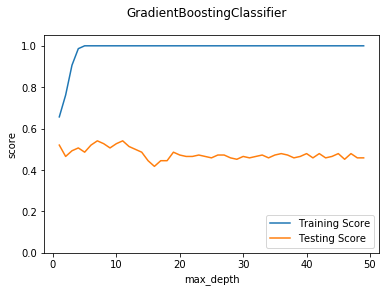

In [22]:
def test_GradientBoostingClassifier_maxdepth(*data):
    '''
    测试 GradientBoostingClassifier 的预测性能随 max_depth 参数的影响
    '''
    X_train,X_test,y_train,y_test=data
    maxdepths=np.arange(1,50)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for maxdepth in maxdepths:
        clf=ensemble.GradientBoostingClassifier(max_depth=maxdepth,max_leaf_nodes=None)
        clf.fit(X_train,y_train)
        training_scores.append(clf.score(X_train,y_train))
        testing_scores.append(clf.score(X_test,y_test))
    ax.plot(maxdepths,training_scores,label="Training Score")
    ax.plot(maxdepths,testing_scores,label="Testing Score")
    ax.set_xlabel("max_depth")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("GradientBoostingClassifier")
    plt.show()
    
# 调用 test_GradientBoostingClassifier_maxdepth
test_GradientBoostingClassifier_maxdepth(x_train,x_test,y_train.astype("int"),y_test.astype("int"))

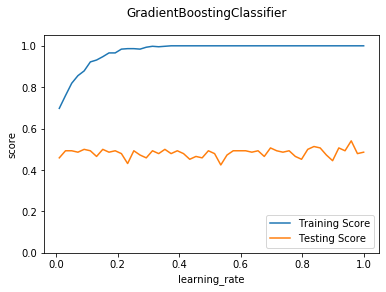

In [23]:
def test_GradientBoostingClassifier_learning(*data):
    '''
    测试 GradientBoostingClassifier 的预测性能随学习率参数的影响
    '''
    X_train,X_test,y_train,y_test=data
    learnings=np.linspace(0.01,1.0)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for learning in learnings:
        clf=ensemble.GradientBoostingClassifier(learning_rate=learning)
        clf.fit(X_train,y_train)
        training_scores.append(clf.score(X_train,y_train))
        testing_scores.append(clf.score(X_test,y_test))
    ax.plot(learnings,training_scores,label="Training Score")
    ax.plot(learnings,testing_scores,label="Testing Score")
    ax.set_xlabel("learning_rate")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("GradientBoostingClassifier")
    plt.show()
    
# 调用 test_GradientBoostingClassifier_learning
test_GradientBoostingClassifier_learning(x_train,x_test,y_train.astype("int"),y_test.astype("int"))

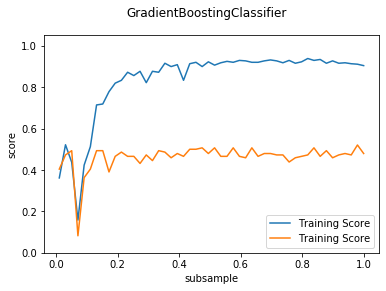

In [24]:
def test_GradientBoostingClassifier_subsample(*data):
    '''
    测试 GradientBoostingClassifier 的预测性能随 subsample 参数的影响
    '''
    X_train,X_test,y_train,y_test=data
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    subsamples=np.linspace(0.01,1.0)
    testing_scores=[]
    training_scores=[]
    for subsample in subsamples:
        clf=ensemble.GradientBoostingClassifier(subsample=subsample)
        clf.fit(X_train,y_train)
        training_scores.append(clf.score(X_train,y_train))
        testing_scores.append(clf.score(X_test,y_test))
    ax.plot(subsamples,training_scores,label="Training Score")
    ax.plot(subsamples,testing_scores,label="Training Score")
    ax.set_xlabel("subsample")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("GradientBoostingClassifier")
    plt.show()
    
# 调用 test_GradientBoostingClassifier_subsample
test_GradientBoostingClassifier_subsample(x_train,x_test,y_train.astype("int"),y_test.astype("int"))

In [9]:
from sklearn.datasets import load_boston
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score
from sklearn.model_selection import train_test_split
import numpy as np
#加载数据集
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
cc1=pd.read_excel("diyige.xlsx",encoding="gbk")
x=cc1[["2015 SR","2015 CY","2015 HJ","2015 WJ","2015 SS"]]
y=cc1[["2020 SR"]]

# 拆分数据集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
# 预处理
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)
y_train = StandardScaler().fit_transform(y_train).ravel()
y_test = StandardScaler().fit_transform(y_test).ravel()

#创建svR实例
svr=SVR(C=1, kernel='rbf', epsilon=0.2)
svr=svr.fit(x_train,y_train)
#预测
svr_predict=svr.predict(x_test)
#评价结果
mae = mean_absolute_error(y_test, svr_predict)
mse = mean_squared_error(y_test, svr_predict)
evs = explained_variance_score(y_test, svr_predict)
r2 = r2_score(y_test, svr_predict)
print("MAE：", mae)
print("MSE：", mse)
print("EVS：", evs)
print("R2：", r2)

MAE： 0.7840392049863941
MSE： 0.968111775506175
EVS： 0.034728851024987684
R2： 0.031888224493825


In [10]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import numpy as np
# 设置超参数
C = [0.1, 0.2, 0.5, 0.8, 0.9, 1, 2, 5, 10]
kernel = 'rbf'
gamma = [0.001, 0.01, 0.1, 0.2, 0.5, 0.8]
epsilon = [0.01, 0.05, 0.1, 0.2, 0.5, 0.8]
# 参数字典
params_dict = {
    'C': C,
    'gamma': gamma,
    'epsilon': epsilon
}

# 创建SVR实例
svr = SVR()

# 网格参数搜索
gsCV = GridSearchCV(
    estimator=svr,
    param_grid=params_dict,
    n_jobs=2,
    scoring='r2',
    cv=6
)
gsCV.fit(x_train, y_train)
# 输出参数信息
print("最佳度量值:", gsCV.best_score_)
print("最佳参数:", gsCV.best_params_)
print("最佳模型:", gsCV.best_estimator_)

# 用最佳参数生成模型
svr = SVR(C=gsCV.best_params_['C'], kernel=kernel, gamma=gsCV.best_params_['gamma'],
          epsilon=gsCV.best_params_['epsilon'])

# 获取在训练集的模型
svr.fit(x_train, y_train)

# 预测结果
svr_predict = svr.predict(x_test)

# 模型评测
mae = mean_absolute_error(y_test, svr_predict)
mse = mean_squared_error(y_test, svr_predict)
evs = explained_variance_score(y_test, svr_predict)
r2 = r2_score(y_test, svr_predict)
print("MAE：", mae)
print("MSE：", mse)
print("EVS：", evs)
print("R2：", r2)


最佳度量值: 0.06350229657882585
最佳参数: {'C': 0.5, 'epsilon': 0.01, 'gamma': 0.1}
最佳模型: SVR(C=0.5, epsilon=0.01, gamma=0.1)
MAE： 0.7815211718615375
MSE： 0.9592987795584892
EVS： 0.04271655031851784
R2： 0.04070122044151081
